In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

## Load Airlines Data

In [ ]:
airline_data = pd.read_csv(os.path.join(sys.path[0], "Airline.csv"))
display(airline_data)

print(airline_data.shape)
airline_data.info()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


(129880, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service     

## Data Cleaning: Handle missing data

### Only 'Arrival Delay in Minutes' column has 393 missing values. Rest of the columns have no missing values.

In [ ]:
null_records = airline_data.isnull().sum().sort_values(ascending=False)
print('****** Null Data ******')
print()
print(null_records)

****** Null Data ******

Arrival Delay in Minutes             393
Inflight entertainment                 0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Gender                                 0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Inflight wifi service                  0
dtype: int64


### Fill missing values of 'Arrival Delay in Minutes' with mean

In [ ]:
mean_arrival_delay = airline_data['Arrival Delay in Minutes'].mean()
airline_data['Arrival Delay in Minutes'] = airline_data['Arrival Delay in Minutes'].fillna(mean_arrival_delay)

### Nature of Dataset: Balanced or Imbalanced

Data distribution between satisfied and dissatisfied customers is around 55:45 respectively. Data seems balanced.

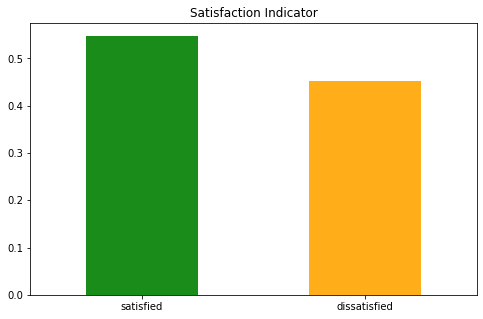

In [ ]:
fig = plt.figure(figsize = (8,5))
airline_data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['green','orange'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator')
plt.show()

## Data split:

- Train set: 60%
- Validation set: 20%
- Test set: 20%

In [ ]:
train, validation, test = np.split(airline_data.sample(frac=1, random_state=42), [int(.6*len(airline_data)), int(.8*len(airline_data))])

print('No of records in Training set: ', train['satisfaction'].count())
print('No of records in Testing set: ', test['satisfaction'].count())
print('No of records in Validation set: ', validation['satisfaction'].count())

No of records in Training set:  77928
No of records in Testing set:  25976
No of records in Validation set:  25976


### Do they follow the same distribution?

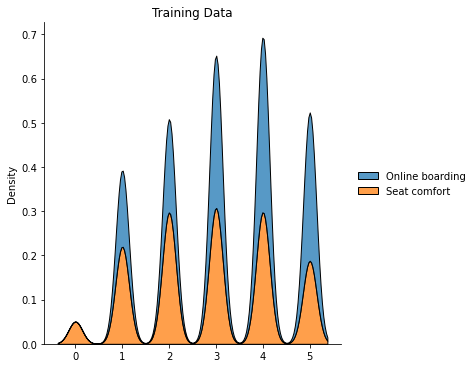

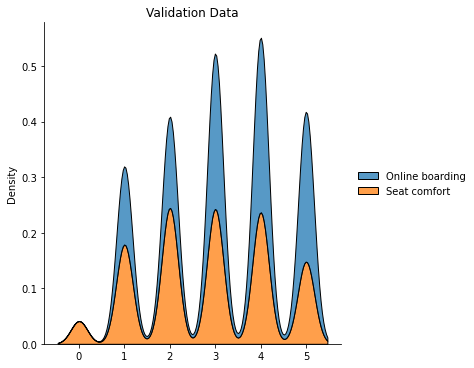

In [ ]:
train_dist = train[['Online boarding', 'Seat comfort']]
validation_dist = validation[['Online boarding', 'Seat comfort']]

sns.displot(train_dist, kind="kde", multiple="stack")
plt.title('Training Data')

sns.displot(validation_dist, kind="kde" ,  multiple="stack")
plt.title('Validation Data')

plt.show()

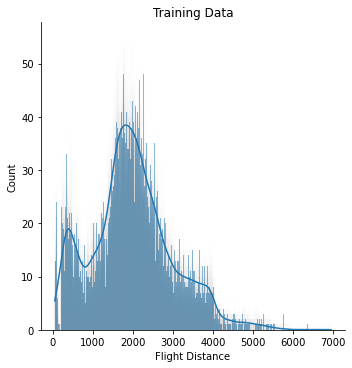

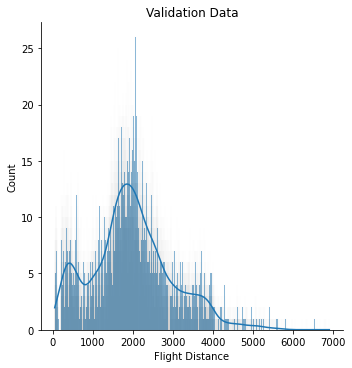

In [ ]:
train_qq = train[['Online boarding', 'Seat comfort', 'Flight Distance']]
validation_qq = validation[['Online boarding', 'Seat comfort', 'Flight Distance']]

sns.displot(train['Flight Distance'], discrete = True, kde = True)
plt.title('Training Data')

sns.displot(validation['Flight Distance'], discrete = True, kde = True)
plt.title('Validation Data')

plt.show()

## QQ plot:

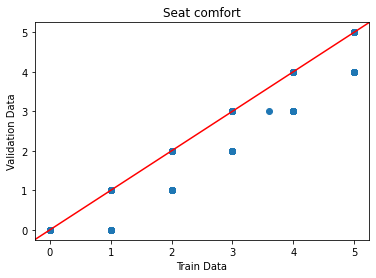

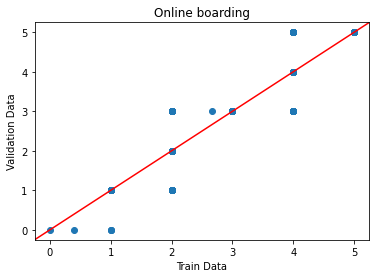

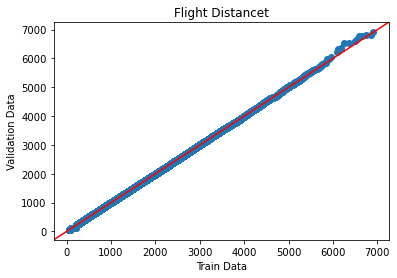

In [ ]:
import statsmodels.api as sm
import pylab as py
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(train['Seat comfort'], validation['Seat comfort'], line ='45')
plt.title('Seat comfort')
plt.xlabel('Train Data')
plt.ylabel('Validation Data')
plt.show()

qqplot_2samples(train['Online boarding'], validation['Online boarding'], line ='45')
plt.title('Online boarding')
plt.xlabel('Train Data')
plt.ylabel('Validation Data')
plt.show()

qqplot_2samples(train['Flight Distance'], validation['Flight Distance'], line ='45')
plt.title('Flight Distancet')
plt.xlabel('Train Data')
plt.ylabel('Validation Data')
plt.show()

## Descriptive analysis:

### Histogram-1

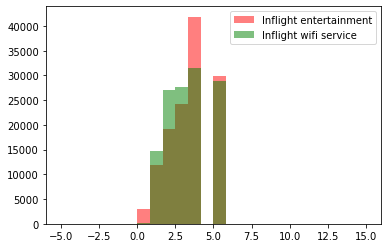

In [ ]:
import numpy
from matplotlib import pyplot

x = [airline_data['Inflight entertainment']]
y = [airline_data['Inflight wifi service']]

bins = numpy.linspace(-5, 15, 25)

pyplot.hist(x, bins, alpha=0.5, label='Inflight entertainment', color=['red'])
pyplot.hist(y, bins, alpha=0.5, label='Inflight wifi service', color=['green'])
pyplot.legend(loc='upper right')
pyplot.show()

### Histogram-2

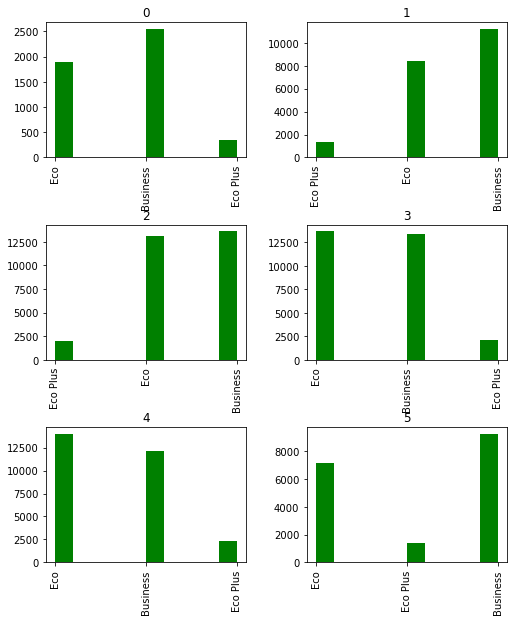

In [ ]:
ax = airline_data.hist(column='Class', by='Seat comfort', bins=10, grid=False, figsize=(8,10), color='green')

### Histogram-3

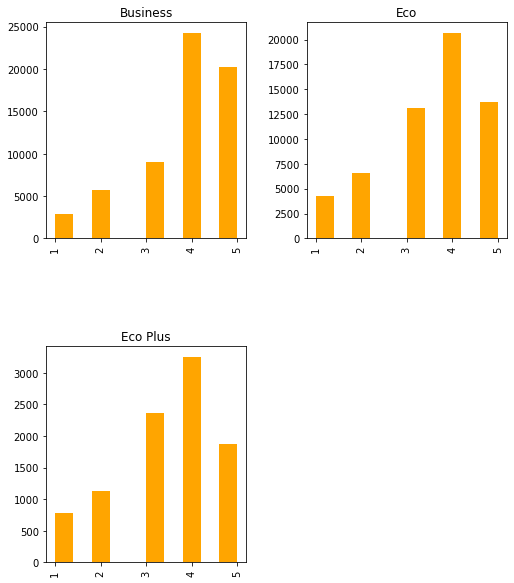

In [ ]:
ax = airline_data.hist(column='Baggage handling', by='Class', grid=False, figsize=(8,10), color='orange')

## Show the dependence of some selected variables and describe what you conclude?

<AxesSubplot:>

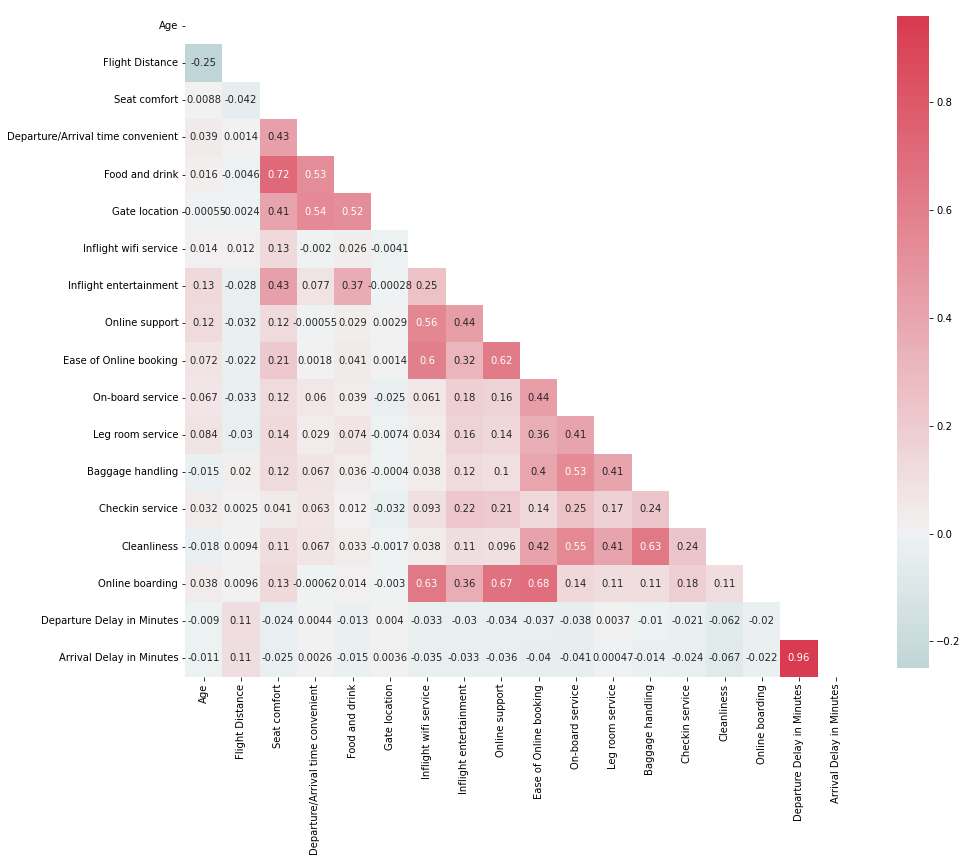

In [ ]:
correlation = airline_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(200, 8, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=None,center=0, square=True, annot=True, cbar_kws={"shrink": .8})

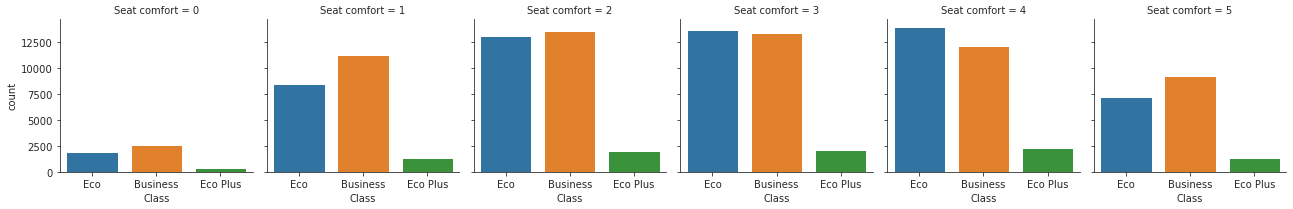

In [ ]:
# plot showing the relation between class and seat comfort
with sns.axes_style(style='ticks'):
   Plot = sns.catplot("Class", col="Seat comfort", data=airline_data, kind="count", height=3, aspect=1)

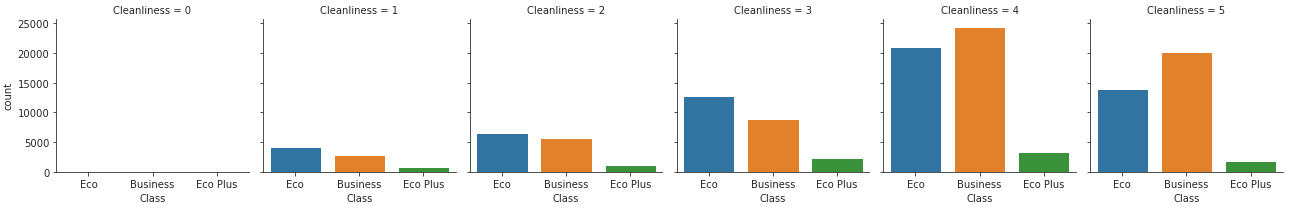

In [ ]:
# plot showing the relation between class and cleanliness
with sns.axes_style(style='ticks'):
    Plot = sns.catplot("Class", col="Cleanliness", data=airline_data, kind="count", height=3, aspect=1)

## Describe the data using its range, sample mean, sample standard deviation and some quantiles

### Sample Mean, Standard Deviation, Range

In [ ]:
airline_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Quantiles

In [ ]:
airline_data.quantile([.1, .25, .5, .75], axis = 0)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0.10,20.0,545.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0
0.25,27.0,1359.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
0.50,40.0,1925.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0
0.75,51.0,2544.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,12.0,13.0


## Choose a visualization method to explore the data set.

### Gender and customer type

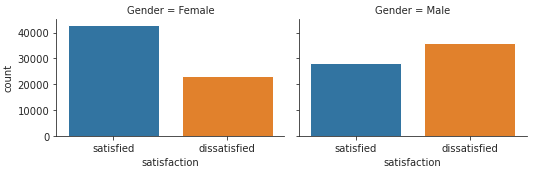

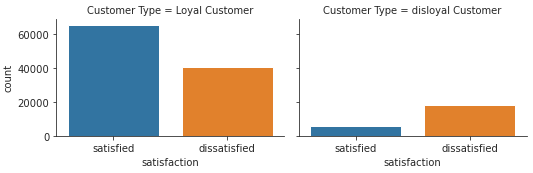

In [ ]:
# Bar plot showing relation between satisfaction with Gender and Customer type
with sns.axes_style(style='ticks'):
    Plot = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=airline_data,  kind='count', height=2.5, aspect=1.5)  
    Plot = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=airline_data, kind='count', height=2.5, aspect=1.5)

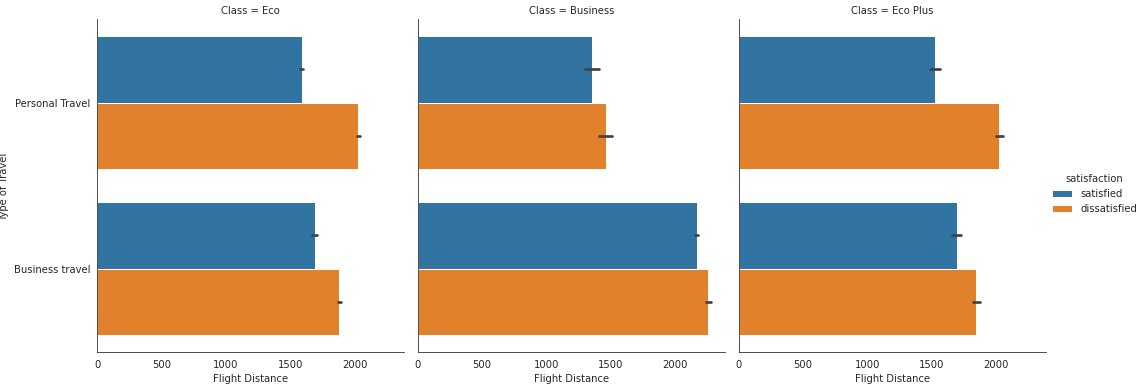

In [ ]:
# Bar plot showing relation between Type of Travel and Flight Distance by Class
with sns.axes_style('white'):
    
    Plot = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=airline_data, kind="bar", height=5.5, aspect=0.9)

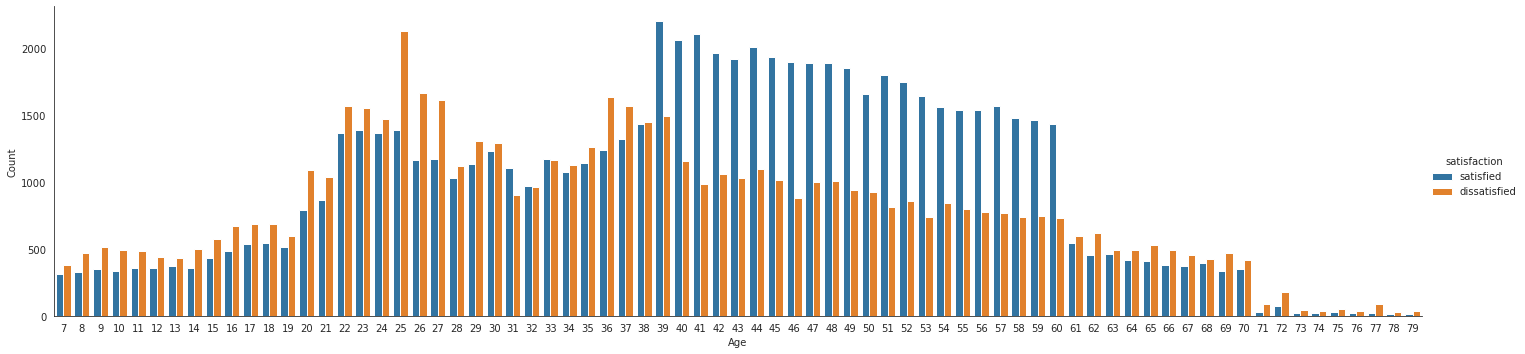

In [ ]:
# Bar plot showing relation between Age and satisfaction
with sns.axes_style('white'):
    Plot = sns.catplot("Age", data=airline_data, aspect=4,  kind='count', hue='satisfaction', order=range(7, 80))
    Plot.set_ylabels('Count')

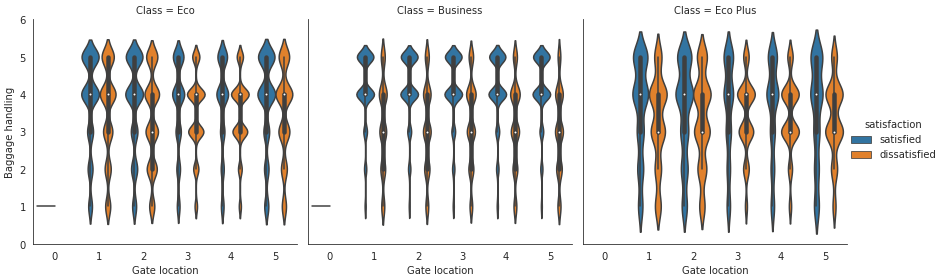

In [ ]:
# Box plot for Gate location and Baggage handling with Class
with sns.axes_style('white'):
    Plot = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=airline_data, kind="violin", height=4)

<AxesSubplot:xlabel='Inflight wifi service', ylabel='satisfaction'>

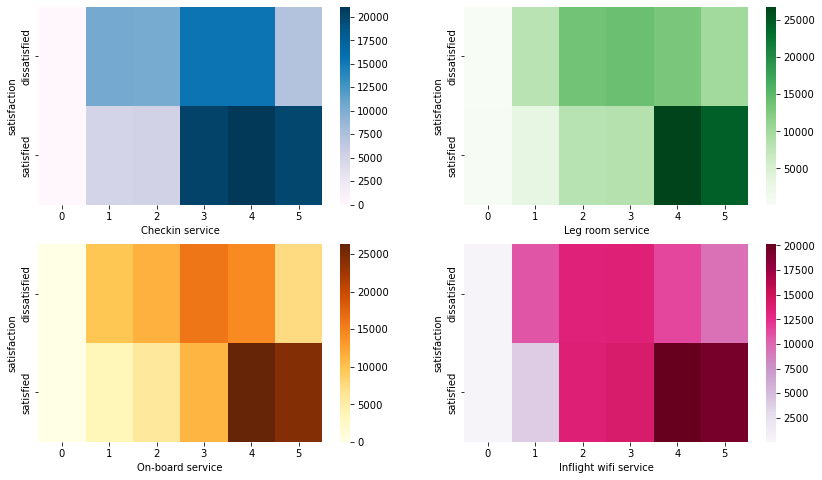

In [ ]:
# Plot showing relation between Checkin service, Leg room service, On-board service and Inflight service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

PLOT_1 = pd.crosstab(airline_data['satisfaction'], airline_data['Checkin service'])
sns.heatmap(PLOT_1, cmap='PuBu', ax = axarr[0][0])
PLOT_2 = pd.crosstab(airline_data['satisfaction'], airline_data['Leg room service'])
sns.heatmap(PLOT_2, cmap='Greens', ax = axarr[0][1])
PLOT_3 = pd.crosstab(airline_data['satisfaction'], airline_data['On-board service'])
sns.heatmap(PLOT_3, cmap='YlOrBr', ax = axarr[1][0])
PLOT_4 = pd.crosstab(airline_data['satisfaction'], airline_data['Inflight wifi service'])
sns.heatmap(PLOT_4, cmap='PuRd', ax = axarr[1][1])

## why are these selected variables important?

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#For Categorical variables we did Label Encoding
Len_Coders = {}
for col in airline_data.select_dtypes(include=['object']).columns:
    Len_Coders[col] = LabelEncoder()
    airline_data[col] = Len_Coders[col].fit_transform(airline_data[col])

In [ ]:
#Important features using Wrapper Method


X = airline_data.drop('satisfaction', axis=1)
y = airline_data['satisfaction']
Select = SelectFromModel(rf(n_estimators=100, random_state=0))
Select.fit(X, y)
Supports = Select.get_support()
Feature = X.loc[:,Supports].columns.tolist()
print(Feature)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of Online booking']
[0.02690479 0.04352633 0.03123286 0.02593345 0.03366466 0.03578876
 0.13823257 0.02489685 0.04060138 0.02009866 0.01620947 0.19578202
 0.06972086 0.06684448 0.04379647 0.04212945 0.02862304 0.02644149
 0.02451248 0.03491219 0.0147107  0.01543703]


## Probability distribution:

### Bernoulli Distribution

Type of Travel    0.690573
dtype: float64


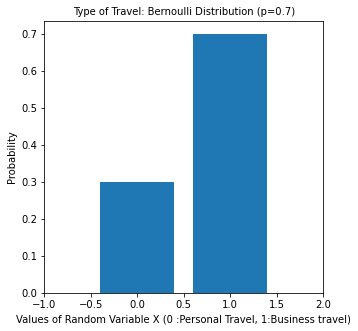

In [ ]:
from scipy.stats import bernoulli

travel = train[['Type of Travel']]

#Replacing 'Type of Travel' column with 0 and 1 values (Personal Travel = 0 and Business travel = 1)
travel['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)

#Parameter p is the sample mean of the observed data
print(travel.mean())

#Bernoulli distribution with parameter p = 0.7
bd = bernoulli(0.7)

X = [0, 1]

plt.figure(figsize=(5,5))
plt.xlim(-1, 2)
plt.bar(X, bd.pmf(X))
plt.title('Type of Travel: Bernoulli Distribution (p=0.7)', fontsize='10')
plt.xlabel('Values of Random Variable X (0 :Personal Travel, 1:Business travel)', fontsize='10')
plt.ylabel('Probability', fontsize='10')
plt.show()

Class    0.479289
dtype: float64


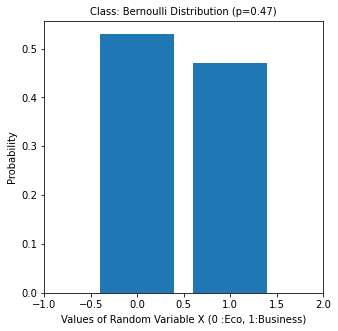

In [ ]:
class_type = train[['Class']]

#Replacing column values with 0, 1 and 2 (Eco = 0, Eco Plus = 1 and Business = 2)
class_type['Class'].replace({'Eco': 0, 'Eco Plus': 0 , 'Business': 1},inplace = True)

print(class_type.mean())

#Bernoulli distribution with parameter p = 0.47
bd = bernoulli(0.47)

X = [0, 1]

plt.figure(figsize=(5,5))
plt.xlim(-1, 2)
plt.bar(X, bd.pmf(X))
plt.title('Class: Bernoulli Distribution (p=0.47)', fontsize='10')
plt.xlabel('Values of Random Variable X (0 :Eco, 1:Business)', fontsize='10')
plt.ylabel('Probability', fontsize='10')
plt.show()

### Categorical Distribution on 'Inflight entertainment'

77928
1810
7064
11454
14572
25112
17916


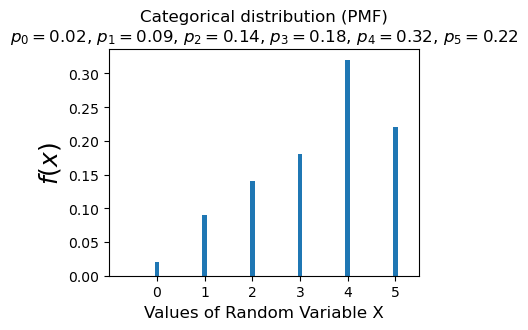

In [ ]:
print(len(flight_entertainment))
# Total records for Inflight entertainment
N = 77928

#
zero_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 0]
print(len(zero_data))#zero_data/N = 0.02 (p0)


one_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 1]
print(len(one_data))#one_data/N = 0.09 (p1)

two_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 2]
print(len(two_data))#two_data/N = 0.14 (p2)

three_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 3]
print(len(three_data))#three_data/N = 0.18 (p3)


four_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 4]
print(len(four_data))#four_data/N = 0.32 (p4)

five_data = flight_entertainment[flight_entertainment['Inflight entertainment'] == 5]
print(len(five_data))#five_data/N = 0.22 (p5)

# Categorical
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 



ax.bar(list(range(0,6)),[0.02, 0.09, 0.14, 0.18, 0.32, 0.22],
           width=0.1); 
ax.set_xlim(-1,5.5)
ax.set_xticks([0,1,2,3,4,5]);
ax.set_title("Categorical distribution (PMF)\n$p_0=0.02$, $p_1=0.09$, $p_2=0.14$, $p_3=0.18$, $p_4=0.32$, $p_5=0.22$")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("Values of Random Variable X", fontsize=12);

## Hypothesis testing
### Statement (Null Hypothesis) : Train and validation samples have same distributions.
### We have tested on 3 columns and for all 3 Null hypothesis is accepted which means they have same distributions.

In [ ]:
#Compare Flight Distance data
from scipy.stats import ttest_ind

val_mean = validation['Flight Distance'].mean()
train_mean = train['Flight Distance'].mean()
alpha = 0.05

print(val_mean)
print(train_mean)

pval = ttest_ind(validation['Flight Distance'],train['Flight Distance'])
print(pval)
print()

if pval[1] < alpha:
    print("p value is ", pval[1], "Null hypothesis rejected")
    print("\nSamples are statistically different")
else:
    print("p value is ", pval[1], "Null hypothesis accepted")
    print("Samples are statistically same")

1979.5636356636896
1982.3955317729185
Ttest_indResult(statistic=-0.38464052556415107, pvalue=0.7005045520117688)

p value is  0.7005045520117688 Null hypothesis accepted
Samples are statistically same


In [ ]:
#Compare Inflight wifi service data
from scipy.stats import ttest_ind

val_mean = validation['Inflight wifi service'].mean()
train_mean = train['Inflight wifi service'].mean()
alpha = 0.05

print(val_mean)
print(train_mean)

pval = ttest_ind(validation['Inflight wifi service'],train['Inflight wifi service'])
print(pval)
print()

if pval[1] < alpha:
    print("p value is ", pval[1], "Null hypothesis rejected")
    print("\nSamples are statistically different")
else:
    print("p value is ", pval[1], "Null hypothesis accepted")
    print("Samples are statistically same")

3.245033877425316
3.2476131813982136
Ttest_indResult(statistic=-0.2728127471455272, pvalue=0.7849977024972479)

p value is  0.7849977024972479 Null hypothesis accepted
Samples are statistically same


In [ ]:
#Compare Seat comfort data
from scipy.stats import ttest_ind

val_mean = validation['Seat comfort'].mean()
train_mean = train['Seat comfort'].mean()
alpha = 0.05

print(val_mean)
print(train_mean)

pval = ttest_ind(validation['Seat comfort'],train['Seat comfort'])
print(pval)
print()

if pval[1] < alpha:
    print("p value is ", pval[1], "Null hypothesis rejected")
    print("\nSamples are statistically different")
else:
    print("p value is ", pval[1], "Null hypothesis accepted")
    print("Samples are statistically same")

2.8240298737295966
2.8422518221948465
Ttest_indResult(statistic=-1.824130803409598, pvalue=0.06813517041047928)

p value is  0.06813517041047928 Null hypothesis accepted
Samples are statistically same


## Predictive analysis:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import time


input_features = ['Inflight entertainment', 'Online boarding','Seat comfort', 'Ease of Online booking', 
                  'On-board service', 'Customer Type', 'Leg room service', 'Food and drink',
                  'Flight Distance', 'Online boarding']

target = ['satisfaction']

#Replacing 'satisfaction' column with 0 and 1 values (dissatisfied = 0 and satisfied = 1)
train['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)
validation['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)

#Replacing 'Customer Type' column with 0 and 1 values (disloyal Customerl = 0 and Loyal Customer = 1)
train['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
validation['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)

x_train_data = train[input_features]
y_train_data = train[target].to_numpy()

x_validation_data = validation[input_features]
y_validation_data = validation[target].to_numpy()


# Normalize train and test data
scaler = StandardScaler()
x_train_data = scaler.fit_transform(x_train_data)
x_validation_data = scaler.fit_transform(x_validation_data)

In [ ]:

def run_model(model, X_train, y_train, X_test, y_test):
    t0=time.time()
    print('Initial Time:', t0)
    
    model.fit(X_train,y_train.ravel())
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print('After Time:', time.time())
    time_taken = time.time()-t0
    print("Model Accuracy = {}".format(accuracy))
    print("Area under ROC Curve = {}".format(roc_auc))
    print("Total Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

## Naive Bayes:


Initial Time: 1641402879.650049
After Time: 1641402879.683378
Model Accuracy = 0.8045888512473052
Area under ROC Curve = 0.8011124678156397
Total Time taken = 0.03342485427856445
              precision    recall  f1-score   support

           0    0.79706   0.76364   0.77999     11783
           1    0.81038   0.83858   0.82424     14193

    accuracy                        0.80459     25976
   macro avg    0.80372   0.80111   0.80212     25976
weighted avg    0.80434   0.80459   0.80417     25976



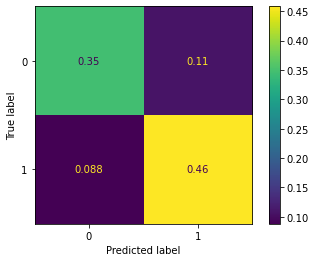

In [ ]:
from sklearn.naive_bayes import GaussianNB

params_Gnb = {}

model_Gnb = GaussianNB(**params_Gnb)
model_Gnb, accuracy_Gnb, roc_auc_Gnb, tt_Gnb = run_model(model_Gnb, x_train_data, y_train_data, x_validation_data, y_validation_data)

## KNN:



Initial Time: 1641402898.965326
After Time: 1641402900.331221
Model Accuracy = 0.8984447182014167
Area under ROC Curve = 0.8999623580119077
Total Time taken = 1.3659999370574951
              precision    recall  f1-score   support

           0    0.86730   0.91632   0.89114     11783
           1    0.92711   0.88360   0.90483     14193

    accuracy                        0.89844     25976
   macro avg    0.89720   0.89996   0.89798     25976
weighted avg    0.89998   0.89844   0.89862     25976



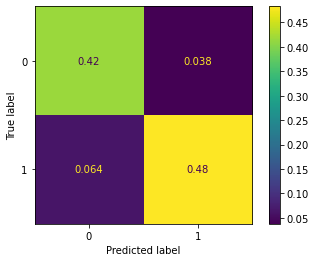

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {'n_neighbors':8, 'algorithm': 'kd_tree', 'n_jobs':5}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, tt_knn = run_model(model_knn, x_train_data, y_train_data, x_validation_data, y_validation_data)

## Compare two models:

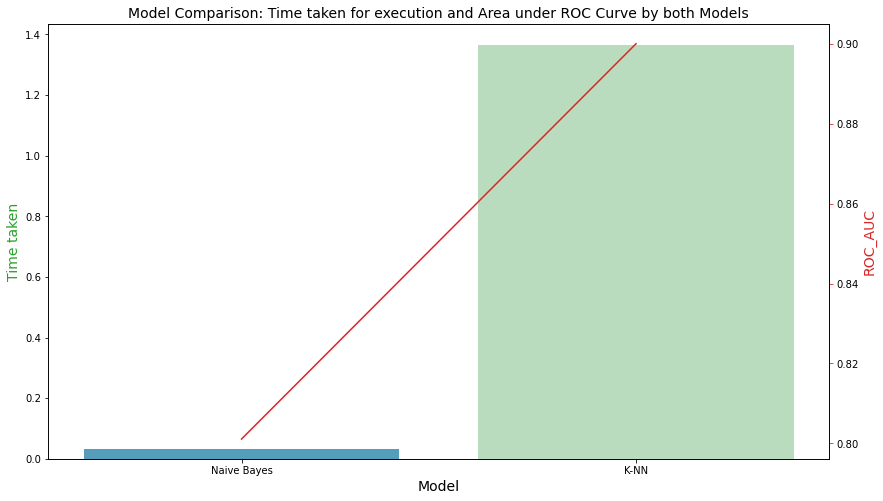

In [ ]:
roc_auc_scores = [roc_auc_Gnb, roc_auc_knn]
tt = [tt_Gnb, tt_knn]

model_data = {'Model': ['Naive Bayes','K-NN'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Time taken for execution and Area under ROC Curve by both Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2.set_yticks((0.80, 0.82, 0.84, 0.86, 0.88, 0.90))
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

## Run KNN model with Test data

Initial Time: 1641402909.605977
After Time: 1641402910.930947
Model Accuracy = 0.9026024022174315
Area under ROC Curve = 0.9042577094232414
Total Time taken = 1.3251137733459473
              precision    recall  f1-score   support

           0    0.87042   0.92111   0.89505     11712
           1    0.93197   0.88741   0.90914     14264

    accuracy                        0.90260     25976
   macro avg    0.90119   0.90426   0.90210     25976
weighted avg    0.90422   0.90260   0.90279     25976



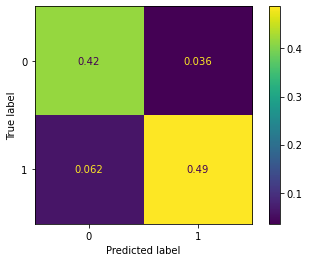

In [ ]:
test['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)
test['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)

#Replacing 'satisfaction' column with 0 and 1 values (dissatisfied = 0 and satisfied = 1)
test['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)

#Replacing 'Customer Type' column with 0 and 1 values (disloyal Customerl = 0 and Loyal Customer = 1)
test['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)

x_test_data = test[input_features]
y_test_data = test[target].to_numpy()

# Normalize test data
x_test_data = scaler.fit_transform(x_test_data)

params_knn_test = {'n_neighbors':8, 'algorithm': 'kd_tree', 'n_jobs':5}

model_knn_test = KNeighborsClassifier(**params_knn_test)
model_knn_test, accuracy_knn_test, roc_auc_knn_test, tt_knn_test = run_model(model_knn_test, x_train_data, y_train_data, x_test_data, y_test_data)